The task is:Do the previous challenge with deep neural networks

In [ ]:
import os

user = "nabiyevnabi"
key = "537f0bf74e01a683b40715ce7b7418ad"
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d luisblanche/covidct

!unzip /content/covidct.zip

!unzip /content/covid19-ct-scans.zip

import os
import glob
import numpy as np
from skimage import io
from skimage.transform import resize

x=[]
y = []

for c in sorted(glob.glob('/content/CT_COVID/*.png')):
    im = resize(io.imread(c), (300, 500, 1))
    x.append(im)
    y.append(1)

for nc in sorted(glob.glob('/content/CT_NonCOVID/*.png')):
    im = resize(io.imread(nc), (300, 500, 1))
    x.append(im)
    y.append(0)

x = np.array(x)

 78% 67.0M/85.8M [00:00<00:00, 152MB/s]
100% 85.8M/85.8M [00:00<00:00, 175MB/s]
Archive:  /content/covidct.zip
  inflating: COVID-CT-MetaInfo.xlsx  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: CT_COVID/2020.01.24.919183-p27-132.png  
  inflating: CT_COVID/2020.01.24.919183-p27-133.png  
  inflating: CT_COVID/2020.01.24.919183-p27-134.png  
  inflating: CT_COVID/2020.01.24.919183-p27-135.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%0.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%1.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%10.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%11.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%12.png  
  inflating: CT

##Basic Dense model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

X_train = X_train.reshape(408, 300*500*1)
X_test = X_test.reshape(136, 300*500*1)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(1024, input_dim=(300*500*1), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
26/26 [==============================] - 1s 36ms/step - loss: 11.4910 - accuracy: 0.6471
Epoch 2/20
26/26 [==============================] - 1s 35ms/step - loss: 4.4934 - accuracy: 0.7843
Epoch 3/20
26/26 [==============================] - 1s 35ms/step - loss: 1.2811 - accuracy: 0.8333
Epoch 4/20
26/26 [==============================] - 1s 36ms/step - loss: 1.5353 - accuracy: 0.8162
Epoch 5/20
26/26 [==============================] - 1s 35ms/step - loss: 2.3273 - accuracy: 0.7917
Epoch 6/20
26/26 [==============================] - 1s 36ms/step - loss: 0.7794 - accuracy: 0.8627
Epoch 7/20
26/26 [==============================] - 1s 35ms/step - loss: 0.9678 - accuracy: 0.8456
Epoch 8/20
26/26 [==============================] - 1s 35ms/step - loss: 0.8162 - accuracy: 0.8578
Epoch 9/20
26/26 [==============================] - 1s 35ms/step - loss: 0.5415 - accuracy: 0.8922
Epoch 10/20
26/26 [==============================] - 1s 35ms/step - loss: 0.4413 - accuracy: 0.8799
Epoch 11

In [ ]:
_,test_acc=model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.3064 - accuracy: 0.9118


##CNN 2D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D
#create model
model_2 = Sequential()
#add model layers
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

X_train = X_train.reshape(408, 300,500,1)
X_test = X_test.reshape(136, 300,500,1)
model_2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(300,500,1)))
model_2.add(MaxPool2D((2,2)))
model_2.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2.add(MaxPool2D((2,2)))
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
#train the model
history_2=model_2.fit(X_train, y_train, epochs=20,batch_size=16)

Epoch 1/20
26/26 [==============================] - 2s 74ms/step - loss: 0.8720 - accuracy: 0.6740
Epoch 2/20
26/26 [==============================] - 2s 71ms/step - loss: 0.4451 - accuracy: 0.8358
Epoch 3/20
26/26 [==============================] - 2s 71ms/step - loss: 0.3078 - accuracy: 0.8848
Epoch 4/20
26/26 [==============================] - 2s 72ms/step - loss: 0.2066 - accuracy: 0.9216
Epoch 5/20
26/26 [==============================] - 2s 72ms/step - loss: 0.1211 - accuracy: 0.9583
Epoch 6/20
26/26 [==============================] - 2s 72ms/step - loss: 0.0951 - accuracy: 0.9706
Epoch 7/20
26/26 [==============================] - 2s 72ms/step - loss: 0.0279 - accuracy: 0.9951
Epoch 8/20
26/26 [==============================] - 2s 72ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 9/20
26/26 [==============================] - 2s 72ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 10/20
26/26 [==============================] - 2s 73ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 11/

In [ ]:
_,test_acc_2=model_2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 41ms/step - loss: 0.2697 - accuracy: 0.9118


In [ ]:
from keras.layers import Dense, Conv1D, Flatten,MaxPool1D

##CNN 1D

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

X_train = X_train.reshape(408, 300,500)
X_test = X_test.reshape(136, 300,500)

In [ ]:
model_3 = Sequential()
model_3.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(300,500)))
model_3.add(MaxPool1D(2))
model_3.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model_3.add(MaxPool1D(pool_size=2))
model_3.add(Flatten())
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
history_3=model_3.fit(X_train, y_train, epochs=20,batch_size=16)

Epoch 1/20
26/26 [==============================] - 0s 6ms/step - loss: 0.1510 - accuracy: 0.9314
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 0.1627 - accuracy: 0.9436
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.1308 - accuracy: 0.9461
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 0.1173 - accuracy: 0.9461
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.0977 - accuracy: 0.9706
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9706
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.1508 - accuracy: 0.9412
Epoch 8/20
26/26 [==============================] - 0s 7ms/step - loss: 0.1269 - accuracy: 0.9485
Epoch 9/20
26/26 [==============================] - 0s 7ms/step - loss: 0.1101 - accuracy: 0.9632
Epoch 10/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.9608
Epoch 11/20
26/26 [

In [ ]:
_,test_acc_3=model_3.evaluate(X_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.9191


##Visualization

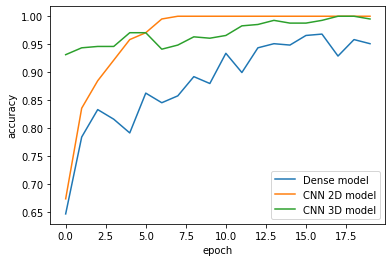

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Dense model')
plt.plot(history_2.history['accuracy'],label='CNN 2D model')
plt.plot(history_3.history['accuracy'],label='CNN 3D model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()